# Mathematical Underpinnings - Lab 3

In [1]:
from itertools import count, islice, product

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

np.random.seed(997)

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [2]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [3]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

# from itertools import combinations
# from itertools import permutations
# from itertools import product

In [4]:
def is_shattered(S, plot=False):
    S = np.array(S)
    n, d = S.shape

    assert n > 1

    if plot:
        assert d == 2
    else:
        assert d > 0

    ys = product([0, 1], repeat=n)
    # ignore homogeneity and symmetry
    ys = islice(ys, 1, 2 ** (n - 1))

    shattered = True
    for i, y in enumerate(ys, 1):
        model = SVC(C=1e4, kernel="linear", shrinking=False, tol=1e-5).fit(S, y)
        separable = all(model.predict(S) == y)
        shattered &= separable

        if plot:
            if separable:
                DecisionBoundaryDisplay.from_estimator(
                    model, S, response_method="predict", eps=0.05, alpha=0.5
                )
            plt.scatter(S[:, 0], S[:, 1], c=y, s=100, edgecolors="black")
            plt.title(f"Case {i} - {"separable" if separable else "not separable"}")
            plt.show()
        elif not shattered:
            break

    return shattered

### c)

In [5]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

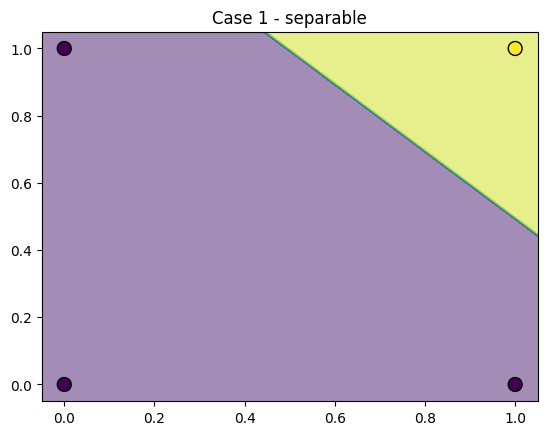

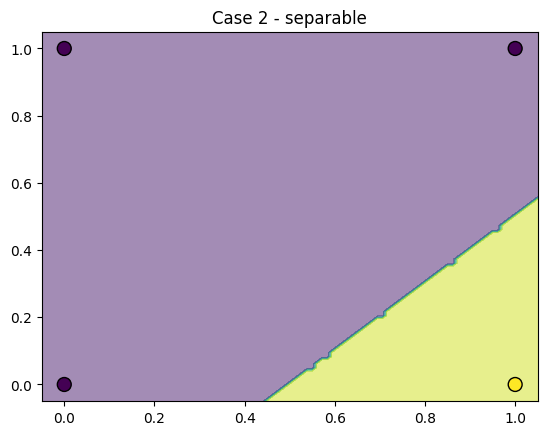

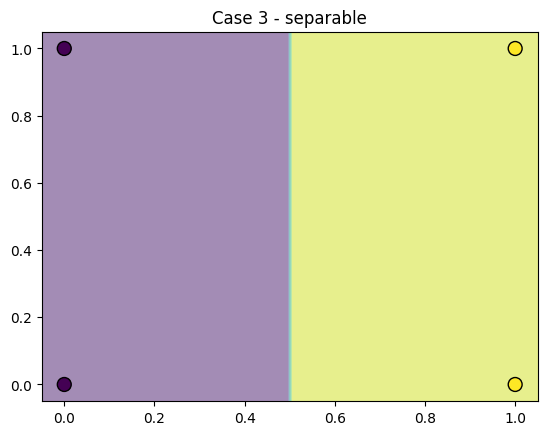

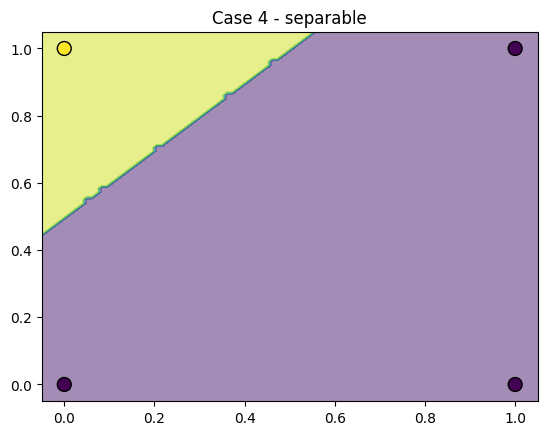

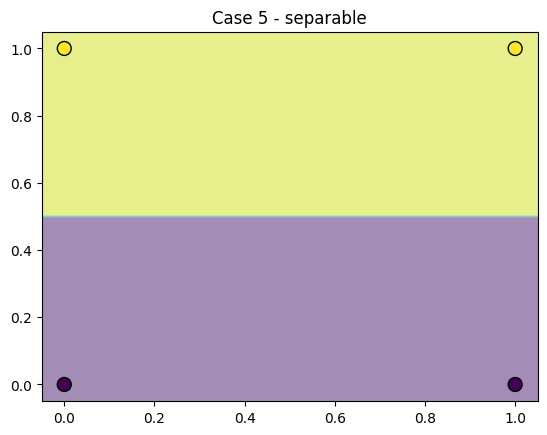

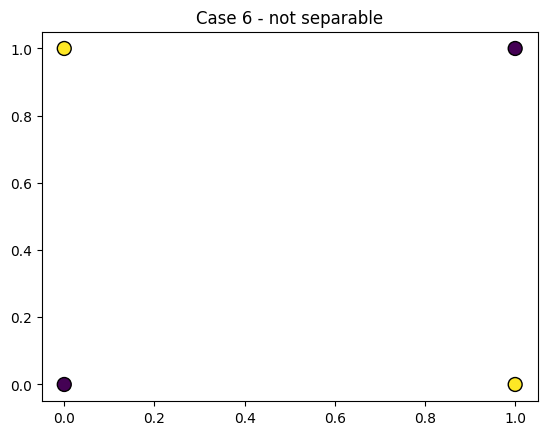

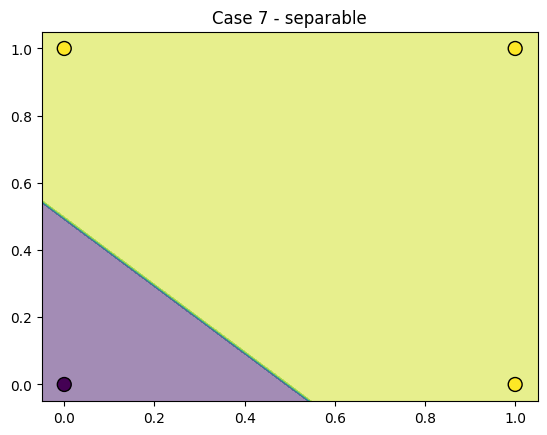

In [6]:
is_shattered([(0, 0), (0, 1), (1, 0), (1, 1)], plot=True);

The function works as expected.

### d)

In [7]:
# code

In [8]:
results = []
for d in range(2, 11):
    for n in count(2):
        for _ in range(50):
            S = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
            if is_shattered(S):
                break
        else:
            results.append((d, n))
            break

results = np.array(results)

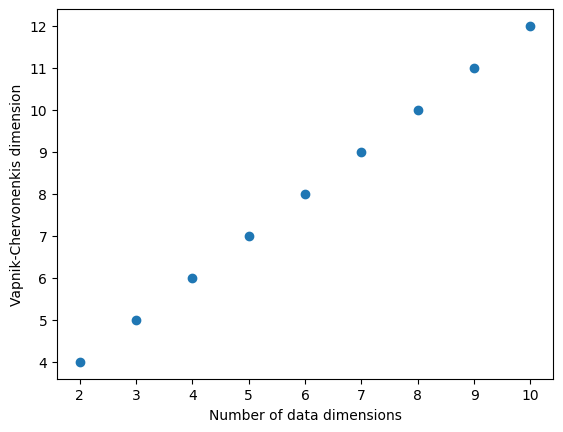

In [9]:
plt.scatter(results[:, 0], results[:, 1])
plt.xlabel("Number of data dimensions")
plt.ylabel("Vapnik-Chervonenkis dimension")

plt.show()

Indeed, if $\mathcal{F}_{a,b}=\{f:f(x)=a'x+b\}$, then $VC(\mathcal{F}_{a,b})=d+2$.